In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Signal

class SawtoothSignal(Signal):
    """Represents a sawtooth signal."""

    def __init__(self, freq=440, amp=1.0, offset=0):
        """Initializes the sawtooth signal.

        freq: frequency in Hz
        amp: amplitude
        offset: phase offset in radians
        """
        self.freq = freq
        self.amp = amp
        self.offset = offset

    @property
    def period(self): return 1.0 / self.freq

    def evaluate(self, ts):
        """Evaluates the signal at the given times."""
        cycles = self.freq * ts + self.offset / (2 * np.pi)
        frac, _ = np.modf(cycles)
        ys = frac * 2 - 1
        return ys

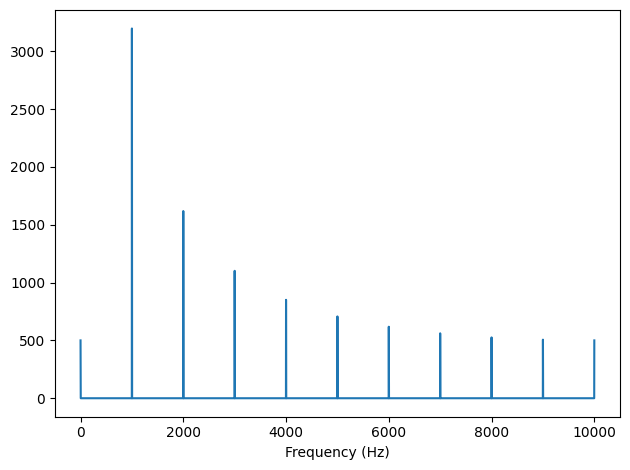

In [3]:
from thinkdsp import Wave, decorate

signal = SawtoothSignal(freq=1000, amp=1.0, offset=0)
wave = signal.make_wave(duration=0.5, framerate=20000)
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')



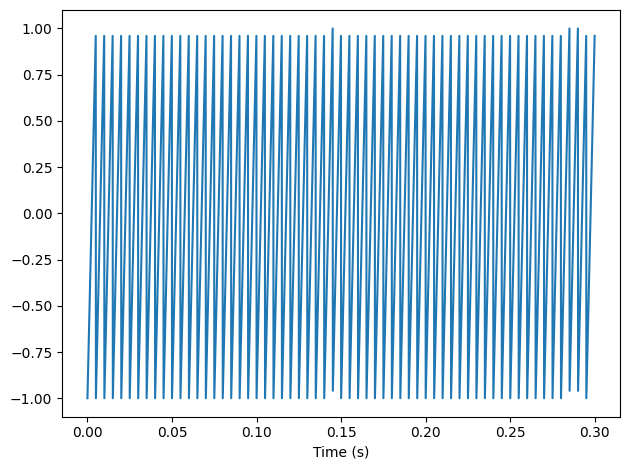

In [4]:
signal = SawtoothSignal(200)
duration = signal.period*3
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='Time (s)')

Треугольный сигнал от прямоугольного отличают амплитуды, прямоугольная ампилтуда обратно пропорциональна частоте, а треугольная амплитутда обратно пропорционально квадрату частоты.

А пилообразный сигнал от треугольного отличает то, что в пилообразном есть четные гармоники и коэффициент пропорциональности меньше.